## Libraries

In [32]:
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datasets import Dataset

## Config

In [33]:
# Load the config file
with open('../data/trainer_state.json', 'r') as f:
    data = json.load(f)

# Convert dictionary to a Hugging Face Dataset
eval_df = pd.DataFrame(data['log_history'])
eval_df = eval_df.rename(columns={
    'loss': 'train_loss'
    })

# Select evaluation rows
eval_results = eval_df[eval_df['eval_loss'].notna()].copy()

# Forward-fill training columns from previous rows
eval_results[['grad_norm', 'learning_rate', 'train_loss']] = eval_df[['grad_norm', 'learning_rate', 'train_loss']].ffill()

eval_results.reset_index(drop=True, inplace=True)

eval_results


,epoch,grad_norm,learning_rate,train_loss,step,eval_accuracy,eval_auc,eval_f1_harmonic,eval_loss,eval_precision,eval_recall,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,1.0,4.779315,1.600000e-06,0.4366,564,0.945922,0.982879,0.755020,0.200246,0.632997,0.935323,35.9514,62.751,3.922
1,2.0,47.854313,1.200000e-06,0.2429,1128,0.941933,0.984624,0.750476,0.167386,0.608025,0.980100,36.1141,62.469,3.904
2,3.0,1.155716,8.000000e-07,0.2173,1692,0.957447,0.985910,0.789474,0.198762,0.705882,0.895522,36.1212,62.456,3.904
3,4.0,3.934572,4.000000e-07,0.2053,2256,0.957447,0.986324,0.792208,0.197616,0.701149,0.910448,36.0003,62.666,3.917
4,5.0,4.485464,0.000000e+00,0.1929,2820,0.955230,0.986409,0.794297,0.168271,0.672414,0.970149,36.1424,62.420,3.901
5,6.0,21.608078,8.000000e-07,0.2045,3384,0.957004,0.986900,0.798337,0.177094,0.685714,0.955224,36.0863,62.517,3.907
6,7.0,0.163459,6.000000e-07,0.1964,3948,0.954787,0.986952,0.790984,0.179590,0.672474,0.960199,36.1015,62.491,3.906
7,8.0,125.954666,4.000000e-07,0.1715,4512,0.958777,0.987193,0.805031,0.184548,0.695652,0.955224,36.2169,62.291,3.893
8,9.0,0.184778,2.000000e-07,0.1540,5076,0.960106,0.987338,0.809322,0.189499,0.704797,0.950249,36.2335,62.263,3.891
9,10.0,82.577751,0.000000e+00,0.1626,5640,0.959220,0.987341,0.805907,0.190902,0.699634,0.950249,36.1997,62.321,3.895


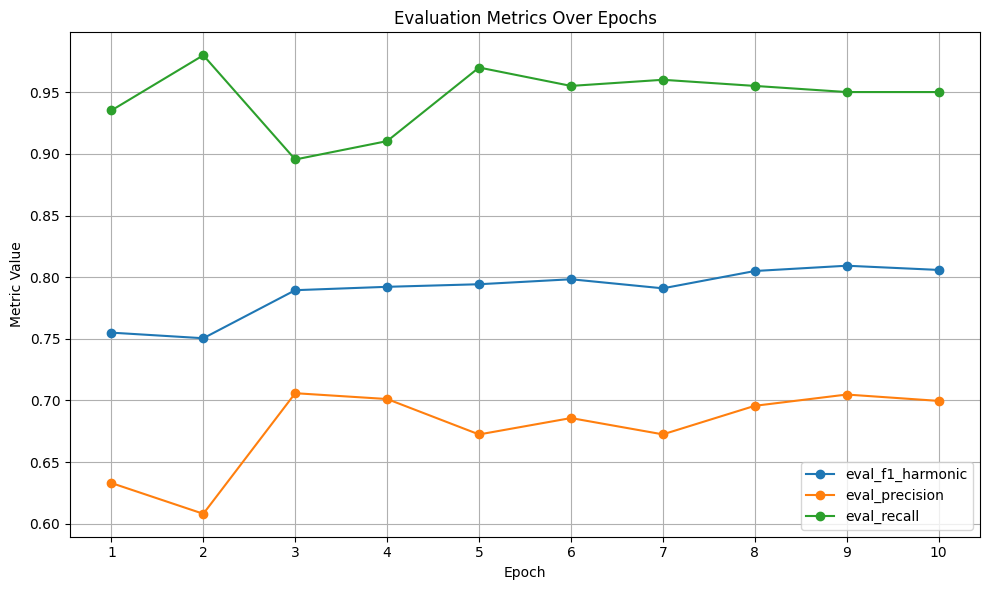

In [34]:
# metrics
df_visual = eval_results.copy()
metrics = ['eval_f1_harmonic', 'eval_precision', 'eval_recall']

plt.figure(figsize=(10, 6))

# Plot each metric
for metric in metrics:
    plt.plot(df_visual['epoch'], df_visual[metric], marker='o', label=metric)

plt.title('Evaluation Metrics Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.xticks(df_visual['epoch'].unique())
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("eval.png")
plt.show()


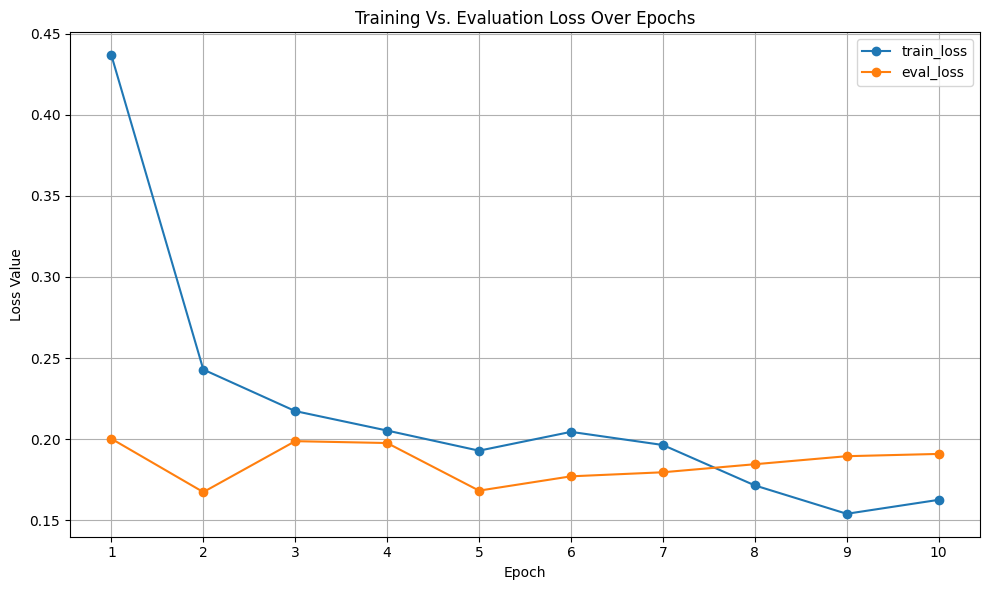

In [35]:
# metrics
df_visual = eval_results.copy()
metrics = ['train_loss', 'eval_loss']

plt.figure(figsize=(10, 6))

# Plot each metric
for metric in metrics:
    plt.plot(df_visual['epoch'], df_visual[metric], marker='o', label=metric)

plt.title('Training Vs. Evaluation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.xticks(df_visual['epoch'].unique())
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("loss.png")
plt.show()
